In [1]:
import pandas as pd
import shap
import xgboost

C:\Users\Win\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [2]:
df = pd.read_csv('LFS_Data.csv')

In [3]:
df = df.drop(columns=['reg_name', 'cwt_name', 'cwt'])

In [4]:
df

,year,reg,gpp,members,sex,age,marital,edu,occup,status,work_hr,weight,salary
0,2013,2,60502,1,1,59,2,12,12,5,35,85.4958,99970
1,2013,2,226173,5,1,52,2,3,54,6,70,423.2613,99000
2,2013,2,174854,4,1,55,2,16,21,5,35,480.9394,98000
3,2013,3,60093,4,1,59,2,18,12,5,24,65.5107,97000
4,2013,1,481118,3,2,28,2,12,93,6,48,512.5734,96000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148799,2015,5,55601,5,1,25,2,3,52,6,30,99.8435,2700
148800,2015,5,55601,3,1,41,2,3,61,6,24,231.4722,2700
148801,2015,5,103220,3,2,26,2,9,72,6,42,87.5258,2650
148802,2015,3,82899,1,2,59,3,3,61,6,42,197.9502,2640


In [5]:
y = df.loc[:, 'salary']
y

0         99970
1         99000
2         98000
3         97000
4         96000
          ...  
148799     2700
148800     2700
148801     2650
148802     2640
148803     2640
Name: salary, Length: 148804, dtype: int64

In [6]:
Weight = df.loc[:, 'weight']
Weight

0          85.4958
1         423.2613
2         480.9394
3          65.5107
4         512.5734
            ...   
148799     99.8435
148800    231.4722
148801     87.5258
148802    197.9502
148803    313.6017
Name: weight, Length: 148804, dtype: float64

In [7]:
X = df.drop(['salary','weight'], axis=1)
X

,year,reg,gpp,members,sex,age,marital,edu,occup,status,work_hr
0,2013,2,60502,1,1,59,2,12,12,5,35
1,2013,2,226173,5,1,52,2,3,54,6,70
2,2013,2,174854,4,1,55,2,16,21,5,35
3,2013,3,60093,4,1,59,2,18,12,5,24
4,2013,1,481118,3,2,28,2,12,93,6,48
...,...,...,...,...,...,...,...,...,...,...,...
148799,2015,5,55601,5,1,25,2,3,52,6,30
148800,2015,5,55601,3,1,41,2,3,61,6,24
148801,2015,5,103220,3,2,26,2,9,72,6,42
148802,2015,3,82899,1,2,59,3,3,61,6,42


In [8]:
X.dtypes

year       int64
reg        int64
gpp        int64
members    int64
sex        int64
age        int64
marital    int64
edu        int64
occup      int64
status     int64
work_hr    int64
dtype: object

In [9]:
# fit XGBoost model to the data

model_xgb = xgboost.XGBRegressor().fit(X, y, sample_weight=Weight)
model_xgb

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


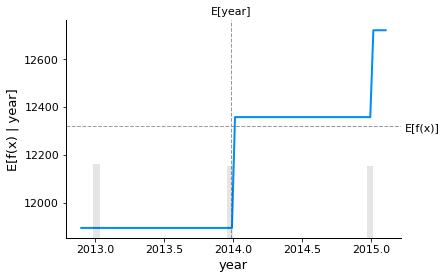

In [11]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "year", model_xgb.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


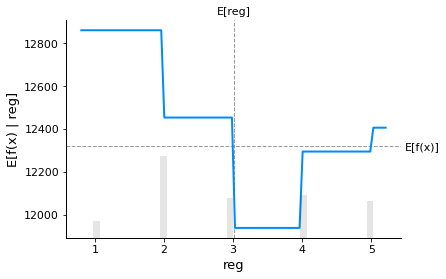

In [13]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "reg", model_xgb.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


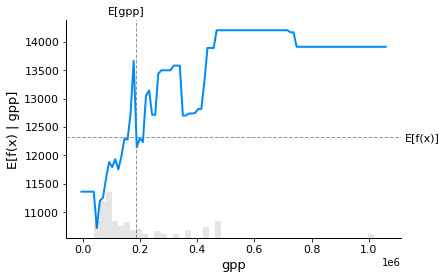

In [15]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "gpp", model_xgb.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


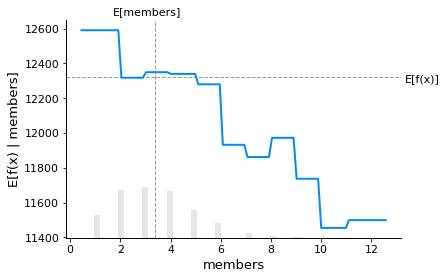

In [17]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "members", model_xgb.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


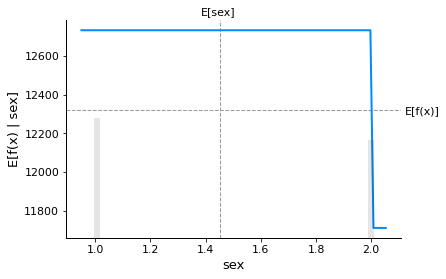

In [19]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "sex", model_xgb.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


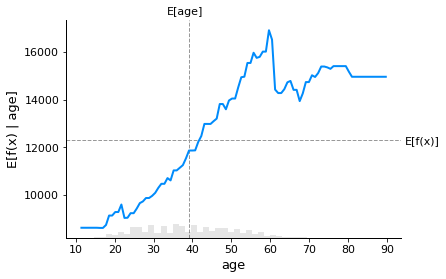

In [21]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "age", model_xgb.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


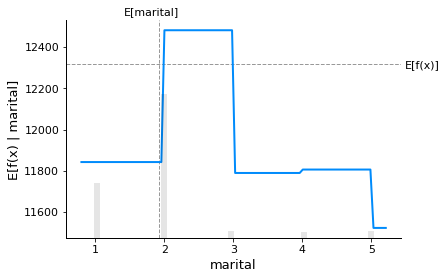

In [23]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "marital", model_xgb.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


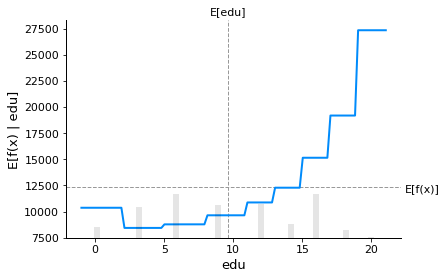

In [25]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "edu", model_xgb.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


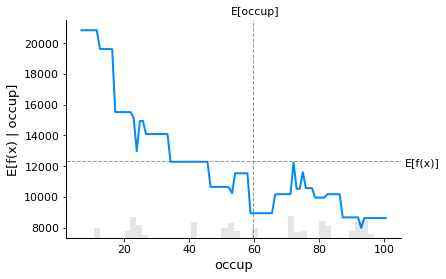

In [27]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "occup", model_xgb.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


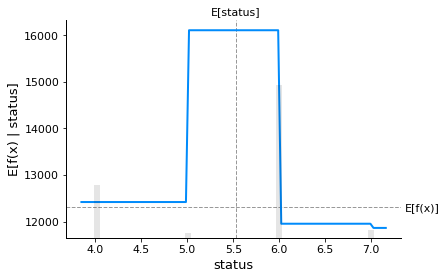

In [29]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "status", model_xgb.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


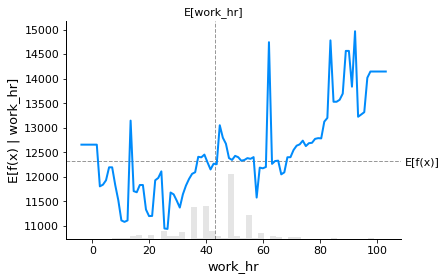

In [31]:
# make a Partial Dependence Plot (PDP)

shap.plots.partial_dependence(
    "work_hr", model_xgb.predict, data=X,
    model_expected_value=True, feature_expected_value=True, ice=False
    )

In [32]:
# explain XGBoost model with SHAP

explainer_xgb = shap.Explainer(model_xgb)
shap_values_xgb = explainer_xgb(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


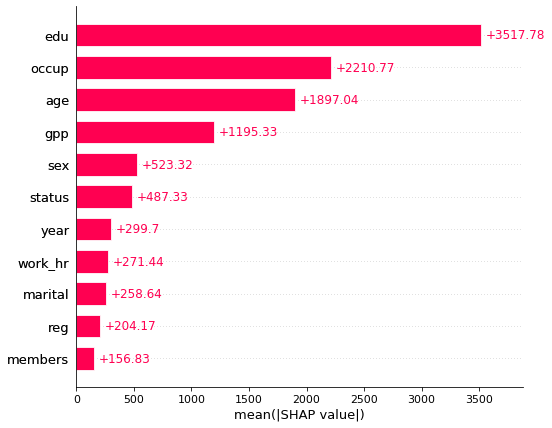

In [33]:
# mean absolute value of each feature over all the instances of the dataset

shap.plots.bar(shap_values_xgb.abs.mean(0), max_display=11)

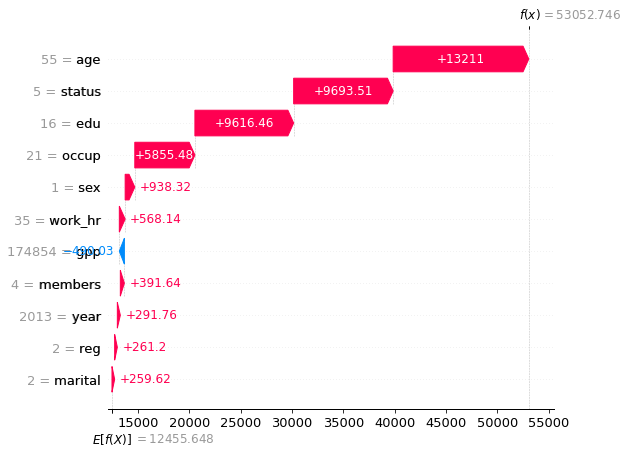

In [35]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
sample_ind = 2
shap.plots.waterfall(shap_values_xgb[sample_ind], max_display=11)